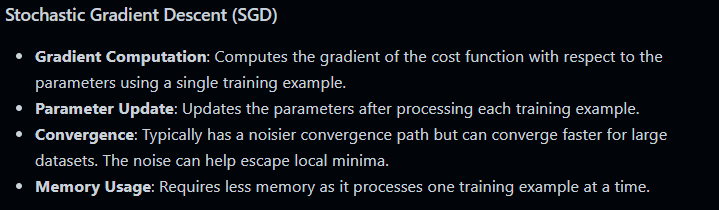

```python
1. Batch Gradient descent performs a lot of computations on big data and is computationaly expensive
2. Hardware issues can be there
```

#### Stochastic Gradient Descent

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [4]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train,y_train)


LinearRegression()

In [7]:
le.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [8]:
le.intercept_

151.34560453985995

In [9]:
y_pred = le.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.4526027629719195


In [10]:
class SGDRegressor:
    def __init__(self,LearningRate,epochs):
        self.coef_ = None
        self.intercept_ = None
        self.lr = LearningRate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                # a random row will be selected
                idx = np.random.randint(0,X_train.shape[0])
                # Y_hat will be calculated for a row and not for the whole dataset
                y_hat  = np.dot(X_train[idx],self.coef_)+self.intercept_

                # the intercept derivative is calculated only for one row
                intercept_der = -2 * (y_train[idx]-y_hat) 
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2*np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
            print(self.coef_,self.intercept_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_


In [11]:
sgd = SGDRegressor(0.01,50)

In [12]:
sgd.fit(X_train,y_train)

[ 5.52884022 -0.16486515 15.49651612 13.42551953  6.52527288  4.34700467
 -7.76752384 11.09905199 15.54476931 10.74585204] 146.86990915871834
[ 10.63122772   0.62082104  30.08804292  25.46249074  12.02261228
   8.58156187 -16.31789851  20.41786414  29.26386634  18.93826957] 154.38470146656124
[ 15.34611242  -0.86653916  42.18824687  35.57439894  16.27125305
  10.79940637 -24.18632117  29.74145278  43.28099053  24.611027  ] 153.29061926854317
[ 18.42944226  -1.20279597  56.14394587  44.96053494  18.16550817
  11.84165847 -34.54319485  39.57917007  56.27229232  33.54271828] 157.95175177276522
[ 20.80691731  -3.27703654  69.29416413  55.43719706  19.13609206
  11.94931449 -42.34704934  46.24905519  66.8308756   40.35557194] 152.56741656500785
[ 22.16739656  -2.2024589   82.68234613  64.60041661  23.27572114
  14.72064671 -49.78617326  54.44213513  78.81583426  49.23395652] 162.97292808677403
[ 25.60843835  -3.12444711  96.32360627  74.10850174  24.83803307
  15.15924817 -55.92285313  60.0

In [13]:
sgd.predict(X_test)

array([161.81442262, 170.4762887 , 160.21375147, 274.72342969,
       146.64828858, 123.82226682, 237.85615903, 203.5272648 ,
       110.2301027 , 134.78999517, 112.62898138, 147.76357186,
        76.92195809, 213.67386736, 125.24340228, 141.26591203,
       223.04652186, 242.29100584, 179.85424406, 212.11874936,
       185.39250894, 109.922806  ,  93.9247201 , 192.34821452,
       149.91415348, 171.28652503, 185.65154474, 179.66071931,
        68.9124496 , 140.84725761, 178.02570375, 108.69506012,
       146.52752529, 187.86406036, 179.90787652, 191.05277963,
       143.82092522, 146.60164131, 173.78153977,  80.32283181,
       102.94797566, 130.39425761, 160.18561694, 173.11573899,
       174.48882046,  84.86213783,  95.38802346, 111.18394887,
        79.69020336, 150.12980895, 141.54365901,  80.84443314,
       136.43647717, 121.11173676, 185.66027591, 146.43100923,
       118.44313625, 194.42295766, 120.48504666,  80.83969506,
       188.36394358, 182.01724174, 142.53478023, 132.85

In [14]:
r2_score(y_test,y_pred)

0.4526027629719195

``` python
stochastic gradient descent is inprecise and does not gurantee the next step will be better than the previous step
```

```python
when to use Stochastic Gradient Descent
1. In case of Big Data where we need to converge faster
2. Non-Convex Functions
```